In [1]:
#Import the necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load The dataset
data = pd.read_csv('https://raw.githubusercontent.com/paathelb/data-science-projects/master/data/insurance.csv')

#Remove datasets with question marks
data = data[(data != '?').all(axis=1)]
data.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Drop some variables
a = data.drop(['sex','smoker','region'], axis = 1)

#Define X and y
X= a.drop('charges', axis = 1)
y = data[['charges']]
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 3 columns):
age         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
dtypes: float64(1), int64(2)
memory usage: 41.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 1 columns):
charges    1338 non-null float64
dtypes: float64(1)
memory usage: 20.9 KB


In [3]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [4]:
#Normalize feature variables
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
y = pd.DataFrame(sc.fit_transform(y), columns=y.columns)
X.head()
y.head()

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802


In [5]:
# Split the dataset into training set and test set with a 80-20 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [6]:
!pip install Keras

# define a seed for random number generator so the result will be reproducible
import numpy as np
import tensorflow as tf

np.random.seed(seed)
tf.set_random_seed(seed)

from keras.models import Sequential
from keras.layers import Dense

# create model
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1))

# Compile model
model_1.compile(loss='mean_squared_error', optimizer='rmsprop', metrics = ['accuracy'])

# train the model using training set while evaluationg on test set
history=model_1.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Using TensorFlow backend.


Lowest error on training set =  0.8423352481048798
Lowest error on validation set =  0.8970771013800778


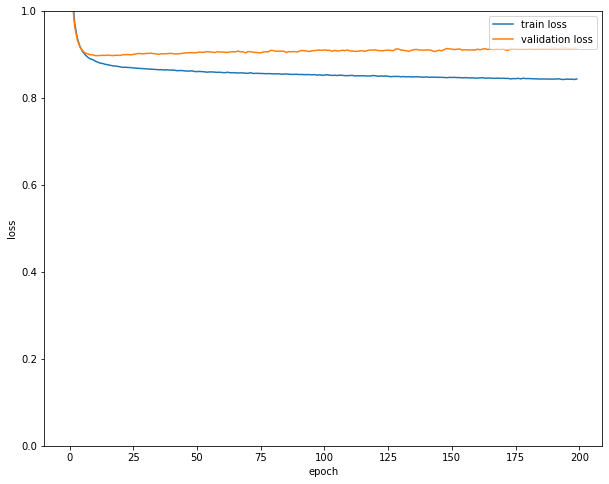

In [7]:
# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# set y axis to be between 0 and 25000, therefore the difference between error rates is more clearly shown
plt.ylim((0, 1))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

In [8]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

from keras.layers import Dropout
# create model
model_2 = Sequential()
model_2.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))

# Compile model
model_2.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluationg on test set
history=model_2.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Lowest error on training set =  0.854004009583286
Lowest error on validation set =  0.8900882148030979


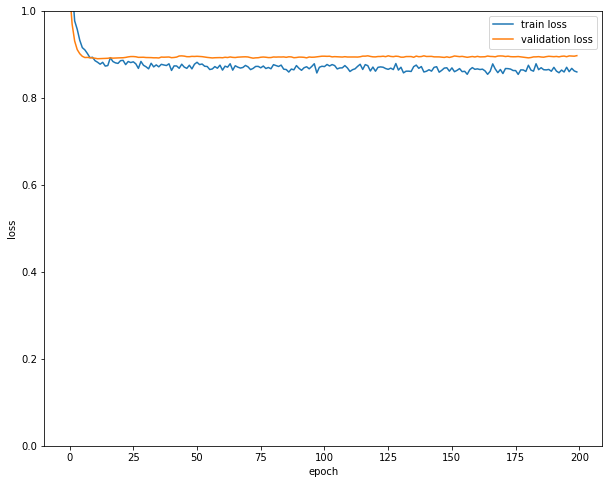

In [9]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((0, 1))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

In [10]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# create model
model_3 = Sequential()
model_3.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(1))
# Compile model
model_3.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluationg on test set
history=model_3.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Lowest error on training set =  0.8629651498571734
Lowest error on validation set =  0.8931741661100245


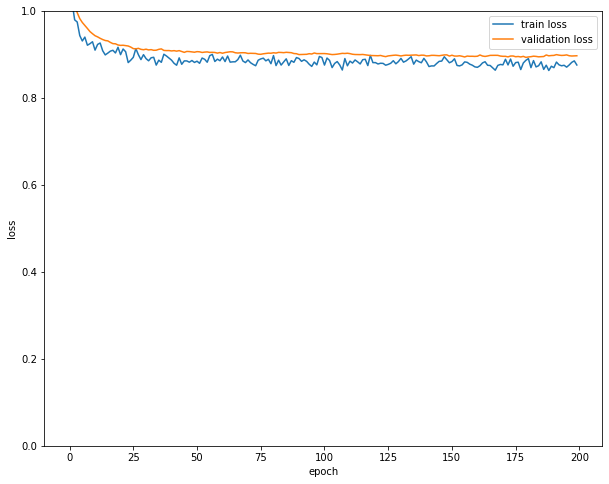

In [11]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((0, 1))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))

In [12]:
# define a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# create model
model_4 = Sequential()
model_4.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model_4.add(Dropout(0.2))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dropout(0.1))
model_4.add(Dense(1))
# Compile model
model_4.compile(loss='mean_squared_error', optimizer='rmsprop')
# train the model using training set while evaluationg on test set
history=model_4.fit(X_train, y_train, batch_size = 50, epochs = 200, validation_data=(X_test, y_test), verbose=0)

Lowest error on training set =  0.8638286941519407
Lowest error on validation set =  0.8927580313896065


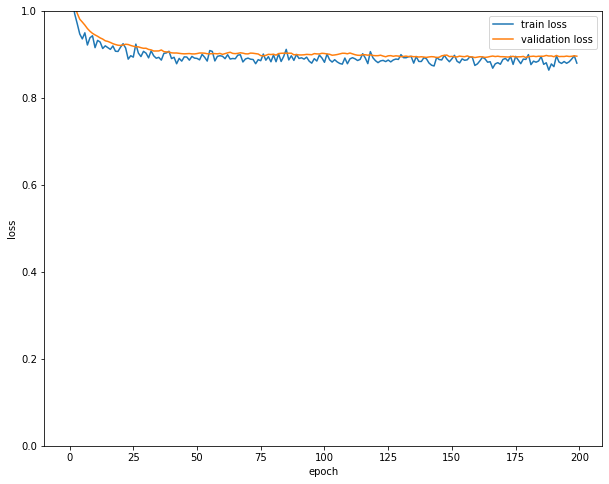

In [13]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim((0, 1))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history.history['loss']))
print("Lowest error on validation set = ", min(history.history['val_loss']))